# Discussion related to Outliers & impact on ML

In [ ]:
##### which machine learning models are sesitive to outlliers
1. Naive bayes Classifier : Not sensitive to Outliers  due to probability
2. SVM                    : Not sensitive to Outliers
3. Linear Regression      : sensitive to Outliers 
4. Logestic Regression    : sensitive to Outliers 
5. Decision Tree Regressor or Classifier : Not sensitive to Outliers
6. Ensamble(RF-Random forest),Xgboost,GB : Not sensitive to Outliers
7. KNN                    : Not sensitive to Outliers: robust
8. K-means                : sensitive to Outliers(eculedian distance)  all UNsupervised will be impacted        
9. hierarchial            : sensitive to Outliers(eculedian distance, impact on outliers )      
10. PCA                   : sensitive to Outliers- more outliers , more variance is not captured during 3D-2D conversion 
11 Neural Networks        : sensitive to Outliers- outliers, outliers*weight in hidden layers and will impact 
12 DBSCAN
13 LDA 

In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()  #fair column is skewed dataset here 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import seaborn as sns

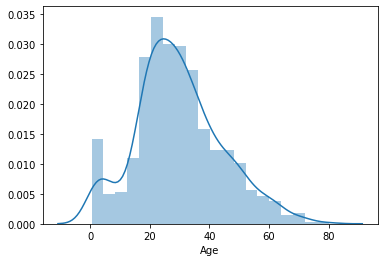

In [4]:
sns.distplot(df['Age'].dropna())

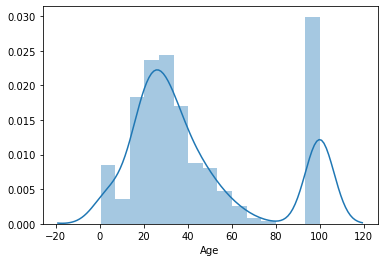

In [5]:
sns.distplot(df['Age'].fillna(100))

In [7]:
###gussaian distribution 

Text(0, 0.5, 'No of passanger')

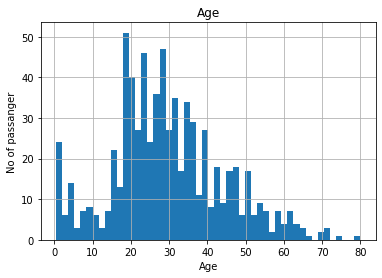

In [6]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passanger')

Text(0, 0.5, 'No of passanger')

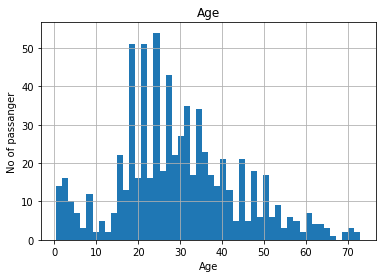

In [41]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passanger') #see difference max age=73 from upper bridge of gassuain distribution , ref below:'data' 

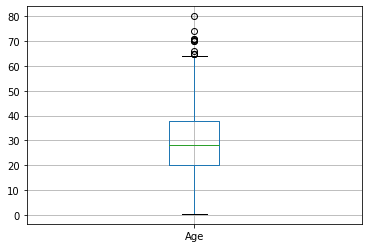

In [8]:
figure =df.boxplot(column='Age')   #black point is outliers

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<h3> if feature are Gassuain/normal distribution, use below approach<h3>

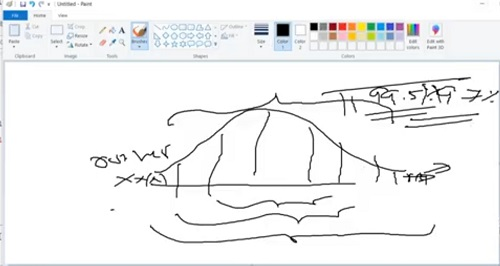

In [13]:
#assumes Age follow Gassuain distribution: we will calculate boundries to differntiate the outliers
upper_boundary =df ['Age'].mean() + 3*df['Age'].std()
lower_boundary =df ['Age'].mean() - 3*df['Age'].std()
print(lower_boundary), print(upper_boundary), print (df['Age'].mean())
#lower_boundary is negative but age cannot be -ve 

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [14]:
#lets compute interquantile range ti calculate the boundries
#interquantile range : IQR, difference between 75% & 25% ,[75],[25]outside these range may be Outliers
IQR =df.Age.quantile(0.75) -df.Age.quantile(0.25)
IQR

17.875

In [19]:
lower_bridge= df['Age'].quantile(.25) -(IQR*1.5)
upper_bridge= df['Age'].quantile(.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)
#neagtive is not considered, age cannot be -ve

-6.6875
64.8125


(None, None)

In [20]:
#extreme outliers
lower_bridge= df['Age'].quantile(.25) -(IQR*3)
upper_bridge= df['Age'].quantile(.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)
#means data after 91 is outlier & below -33 is outlier-but -ve is not be age so not considered

-33.5
91.625


(None, None)

<h3> if feature are Skewed dataset, use below approach<h3>

Text(0, 0.5, 'No of passanger')

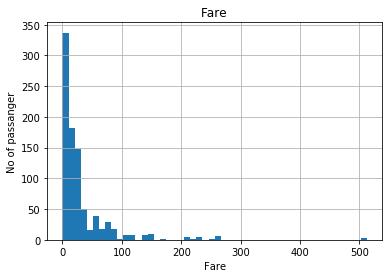

In [24]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passanger')

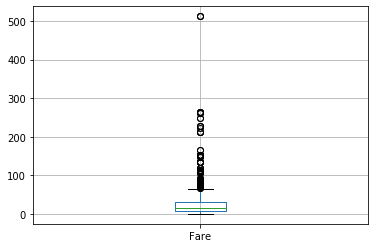

In [23]:
df.boxplot(column='Fare')

In [22]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
#skewed data is different from Gassuian distribution, and this may or may not work for Fare-skewed dataset
#interquantile range : IQR, difference between 75% & 25% ,[75],[25]outside these range may be Outliers
IQR =df.Fare.quantile(0.75) -df.Fare.quantile(0.25)
IQR

23.0896

In [31]:
#skewed dataset
lower_bridge= df['Fare'].quantile(.25) -(IQR*1.5)
upper_bridge= df['Fare'].quantile(.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [32]:
#Extreme skewed dataset
lower_bridge= df['Fare'].quantile(.25) -(IQR*3)
upper_bridge= df['Fare'].quantile(.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)
#when you check hist graph, Right skewed you can see that data are 0-350, 
#and we Extreme upper_bridge we calculated as 100 which is considerable 

-61.358399999999996
100.2688


(None, None)

In [33]:
data =df.copy()

In [34]:
data.loc[data['Age']>73,'Age'] =73 #if value is greater than 73 replace with 73, which we got from lower_boundary

In [37]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.loc[data['Fare']>100,'Fare'] =100 #if value is greater than 100 replace with 100, which we got from lower_boundary

Text(0, 0.5, 'No of passanger')

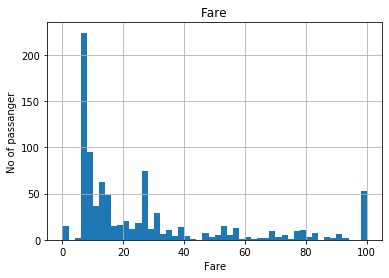

In [39]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passanger')  # you can see earlier max fare was 500, now max is 100

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size =0.3)
#X_train,X_test,y_train,y_test= train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size =0.3)

In [58]:
##Logistic  Regression 
from sklearn.linear_model import LogisticRegression
clf =LogisticRegression()
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
#y_pred1= clf.predict_proba(X_test)
y_pred1= clf.predict_proba(X_test)


from sklearn.metrics import accuracy_score, roc_auc_score
print ('accuracy_score:{} '.format(accuracy_score(y_test,y_pred)))
print ('roc_auc_score:{} '.format(roc_auc_score(y_test,y_pred)))

accuracy_score:0.6455223880597015 
roc_auc_score:0.5812368972746331 


In [59]:
##Ensamble tecnique 
#from sklearn.linear_model import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
y_pred1= clf.predict_proba(X_test)


from sklearn.metrics import accuracy_score, roc_auc_score
print ('accuracy_score:{} '.format(accuracy_score(y_test,y_pred)))
print ('roc_auc_score:{} '.format(roc_auc_score(y_test,y_pred)))

accuracy_score:0.6716417910447762 
roc_auc_score:0.63382250174703 
